In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/HomePriceProject'


/content/drive/MyDrive/Colab Notebooks/HomePriceProject


In [3]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
import numpy as np
import statistics as st

import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
all_dataframe = pd.DataFrame()

for lparse in range(34,2464,18):
    print(lparse)
    req_us = requests.get("https://www.engelvoelkers.com/en/search/?q=&startIndex="+str(lparse)+"&businessArea=residential&sortOrder=DESC&sortField=newestProfileCreationTimestamp&pageSize=18&facets=bsnssr%3Aresidential%3Bcntry%3Aunited_states%3Bobjcttyp%3Ahouse%3Btyp%3Abuy%3B")
    soup_us = BeautifulSoup(req_us.content,"lxml")
    homes_us = soup_us.find_all('div',attrs={'class':'col-lg-4 col-md-4 col-sm-6 col-xs-12'})
    
    from time import monotonic
    data = {'House Price'  :   ['499.000 USD'],
            'Year of Construction'  :  ['1990']}
    df =pd.DataFrame(data)
    print(df)
    i=1
    for home in homes_us:
        link = home.a.get("href")
        print(link)
        
        info = requests.get(link)
        info_soup = BeautifulSoup(info.content,'lxml')
        detail = info_soup.find('div',attrs={'class':'ev-exposee-detail'})
        
        top_money = detail.find('div', attrs={'class':'ev-key-facts'})
        top_money = top_money.find('div', attrs={'class':'show-tablet'})
        money = top_money.find('div', attrs={'class','ev-key-fact-value'}).text
        print('House price = ',money)
        
        home_features = detail.find_all('ul',attrs={'class':'ev-exposee-detail-facts'})
        for home_feature in home_features:
            features = home_feature.find_all('li', attrs={'class':'ev-exposee-detail-fact'})
            feature_dict = {'id':[i]}
            feature_dict["House Price"]=money
            for feature in features:
                key = feature.find('label', attrs={'class','ev-exposee-detail-fact-key'}).text
                value = feature.find('span', attrs={'class':'ev-exposee-detail-fact-value'}).text
                print(key,' = ',value)

                feature_dict[key]=value
            
            df_features = pd.DataFrame.from_dict(feature_dict)
            df = pd.concat([df ,df_features],ignore_index=True)
            i+=1
            
    print(df)
    
    df = df.drop(index=[0,1])
    df.reset_index(drop=True, inplace=True)

    for i in range(0,df.shape[0],4):
        df.loc[i+2,'E&V ID']=df.loc[i,'E&V ID']

    df.fillna(value= {'Year of Construction': df['Year of Construction'].mode()})

    df.dropna(subset=['Total surface approx.'],inplace=True)
    df.reset_index(drop=True,inplace=True)
    df.fillna(0,inplace=True)
    
    for i in range(0,df.shape[0]):  
        df.loc[i,'House Price'] = int(df.loc[i,'House Price'].split()[0].replace('.', ''))
        df.loc[i,'Total surface approx.'] = float(df.loc[i,'Total surface approx.'].split()[0].replace(',', ''))
        if(df.loc[i,'Plot surface approx.']!=0):
            if((df.loc[i,'Plot surface approx.'].split()[1])=='ha'): 
                df.loc[i,'Plot surface approx.'] = float(df.loc[i,'Plot surface approx.'].split()[0].replace(',', ''))
                df.loc[i,'Plot surface approx.']*=10000
            else:    
                df.loc[i,'Plot surface approx.'] = float(df.loc[i,'Plot surface approx.'].split()[0].replace(',', ''))
            
    df.drop('id',axis=1,inplace=True)
    df = df.convert_dtypes()

    for col in df.columns:
        try:
            if(df[col].dtype=='string' or df[col].dtype=='object'):
                df[col] = df[col].astype(int)
        except ValueError:
            pass      # or whatever

    all_dataframe = pd.concat([df, all_dataframe])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Bedrooms  =  3
Half Bathrooms  =  1
Full Bathrooms  =  2
Total surface approx.  =  180.32 m²
Plot surface approx.  =  202.34 m²
Garage  =  2
https://www.engelvoelkers.com/en-us/property/single-family-in-pflugerville-texas-229841.30000_exp/
House price =   499.990 USD 
E&V ID  =  AM-229841
Year of Construction  =  2022
Bedrooms  =  3
Half Bathrooms  =  1
Full Bathrooms  =  2
Total surface approx.  =  192.22 m²
Plot surface approx.  =  202.34 m²
Garage  =  2
https://www.engelvoelkers.com/en-us/property/for-sale-229825.30000_exp/
House price =   285.900 USD 
E&V ID  =  AM-229825
Year of Construction  =  1977
Bedrooms  =  4
Full Bathrooms  =  2
Total surface approx.  =  152.36 m²
Plot surface approx.  =  1,821.09 m²
Garage  =  2
https://www.engelvoelkers.com/en-us/property/single-family-in-chicago-ashburn-illinois-229797.30000_exp/
House price =   349.900 USD 
E&V ID  =  AM-229797
Year of Construction  =  1978
Bedrooms  =  4
Full Bathrooms  = 

In [ ]:
all_dataframe.reset_index(drop=True, inplace=True)
all_dataframe.fillna(0,inplace=True)

In [ ]:
all_dataframe.dtypes

House Price                Int64
Year of Construction       int64
E&V ID                    object
Bedrooms                   int64
Half Bathrooms             int64
Full Bathrooms             int64
Total surface approx.    Float64
Garage                    object
Plot surface approx.     Float64
Bathrooms                float64
dtype: object

In [ ]:
all_dataframe

,House Price,Year of Construction,E&V ID,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
0,790000,2023,AM-184755,3,1,3,232.26,2,0.0,0.0
1,790000,2022,AM-184753,3,1,3,232.26,2,0.0,0.0
2,790000,2023,AM-184746,3,1,3,278.71,2,0.0,0.0
3,1345000,2023,AM-184739,4,1,3,276.39,2,0.0,0.0
4,700000,2021,AM-184627,3,1,3,232.26,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2347,239999,1981,AM-253828,4,0,2,159.79,0,0.0,0.0
2348,625000,2018,AM-253820,4,1,3,238.3,0,137.59,0.0
2349,2175000,2022,AM-253818,2,1,2,174.66,1,607.03,0.0
2350,175000,2009,AM-253813,3,0,2,118.92,0,26700.0,0.0


In [ ]:
all_dataframe.to_csv('homeprice.csv', index=False)

In [16]:
df = pd.read_csv('homeprice.csv')

In [17]:
df.head()

,House Price,Year of Construction,E&V ID,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
0,790000,2023,AM-184755,3,1,3,232.26,2,0.0,0.0
1,790000,2022,AM-184753,3,1,3,232.26,2,0.0,0.0
2,790000,2023,AM-184746,3,1,3,278.71,2,0.0,0.0
3,1345000,2023,AM-184739,4,1,3,276.39,2,0.0,0.0
4,700000,2021,AM-184627,3,1,3,232.26,2,0.0,0.0


In [18]:
df.dtypes

House Price                int64
Year of Construction       int64
E&V ID                    object
Bedrooms                   int64
Half Bathrooms             int64
Full Bathrooms             int64
Total surface approx.    float64
Garage                    object
Plot surface approx.     float64
Bathrooms                float64
dtype: object

In [19]:
df.loc[df['Garage']=='2,323','Garage']=2

In [20]:
df['Garage'] = df['Garage'].astype(int)


In [24]:
df['Year of Construction'].mode()

0    2022
dtype: int64

In [25]:
df.loc[df['Year of Construction']==0,'Year of Construction']=2022


In [26]:
df.head()

,House Price,Year of Construction,E&V ID,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
0,790000,2023,AM-184755,3,1,3,232.26,2,0.0,0.0
1,790000,2022,AM-184753,3,1,3,232.26,2,0.0,0.0
2,790000,2023,AM-184746,3,1,3,278.71,2,0.0,0.0
3,1345000,2023,AM-184739,4,1,3,276.39,2,0.0,0.0
4,700000,2021,AM-184627,3,1,3,232.26,2,0.0,0.0


In [27]:
df.isnull().sum()

House Price              0
Year of Construction     0
E&V ID                   0
Bedrooms                 0
Half Bathrooms           0
Full Bathrooms           0
Total surface approx.    0
Garage                   0
Plot surface approx.     0
Bathrooms                0
dtype: int64

In [28]:
df.describe()

,House Price,Year of Construction,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
count,1.886000e+03,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,1.226727e+06,1996.933192,3.565217,0.504772,2.467656,234.698611,1.455992,749.733770,0.075822
std,2.172514e+06,29.953524,1.064368,0.591477,1.244516,129.309352,1.138627,787.025049,0.481023
min,1.900000e+04,1866.000000,0.000000,0.000000,0.000000,7.440000,0.000000,0.000000,0.000000
25%,3.890000e+05,1982.000000,3.000000,0.000000,2.000000,153.312500,0.000000,0.000000,0.000000
50%,6.099000e+05,2006.000000,3.000000,0.000000,2.000000,205.685000,2.000000,607.030000,0.000000
75%,1.225000e+06,2022.000000,4.000000,1.000000,3.000000,278.710000,2.000000,1011.710000,0.000000
max,4.499500e+07,2024.000000,9.000000,4.000000,9.000000,1212.110000,8.000000,3804.050000,6.000000


In [29]:
df.max()

House Price               44995000
Year of Construction          2024
E&V ID                   AM-253871
Bedrooms                         9
Half Bathrooms                   4
Full Bathrooms                   9
Total surface approx.      1212.11
Garage                           8
Plot surface approx.       3804.05
Bathrooms                      6.0
dtype: object

In [39]:
df=df.drop(df.loc[df['Year of Construction']>2024].index)
df=df.drop(df.loc[df['Plot surface approx.']>3816].index)
df=df.drop(df.loc[df['House Price']>10000000].index)
df.reset_index(drop=True, inplace=True)

In [40]:
df.max()

House Price                9980000
Year of Construction          2024
E&V ID                   AM-253871
Bedrooms                         9
Half Bathrooms                   3
Full Bathrooms                   9
Total surface approx.      1114.84
Garage                           8
Plot surface approx.       3804.05
Bathrooms                      6.0
dtype: object

In [41]:
df.shape

(1866, 10)

In [42]:
corr=df.corr().abs()
n_most_correlated=8
#'SalePrice' ile en yüksek korelasyona sahip özellikler elde edilir.
most_correlated_feature=corr['House Price'].sort_values(ascending=False)[:n_most_correlated].drop('House Price')
#En yüksek korelasyona sahip özelliklerin adları elde edilr. 
most_correlated_feature_name=most_correlated_feature.index.values

In [43]:
corr

,House Price,Year of Construction,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
House Price,1.000000,0.078443,0.417532,0.298068,0.507139,0.630989,0.244960,0.097297,0.024921
Year of Construction,0.078443,1.000000,0.087873,0.228281,0.221684,0.161339,0.233924,0.131428,0.012681
Bedrooms,0.417532,0.087873,1.000000,0.227764,0.624170,0.693892,0.276273,0.141200,0.028625
Half Bathrooms,0.298068,0.228281,0.227764,1.000000,0.243633,0.401881,0.209806,0.050305,0.134881
Full Bathrooms,0.507139,0.221684,0.624170,0.243633,1.000000,0.664686,0.303309,0.061451,0.318779
Total surface approx.,0.630989,0.161339,0.693892,0.401881,0.664686,1.000000,0.427367,0.183694,0.023825
Garage,0.244960,0.233924,0.276273,0.209806,0.303309,0.427367,1.000000,0.169999,0.137296
Plot surface approx.,0.097297,0.131428,0.141200,0.050305,0.061451,0.183694,0.169999,1.000000,0.019939
Bathrooms,0.024921,0.012681,0.028625,0.134881,0.318779,0.023825,0.137296,0.019939,1.000000


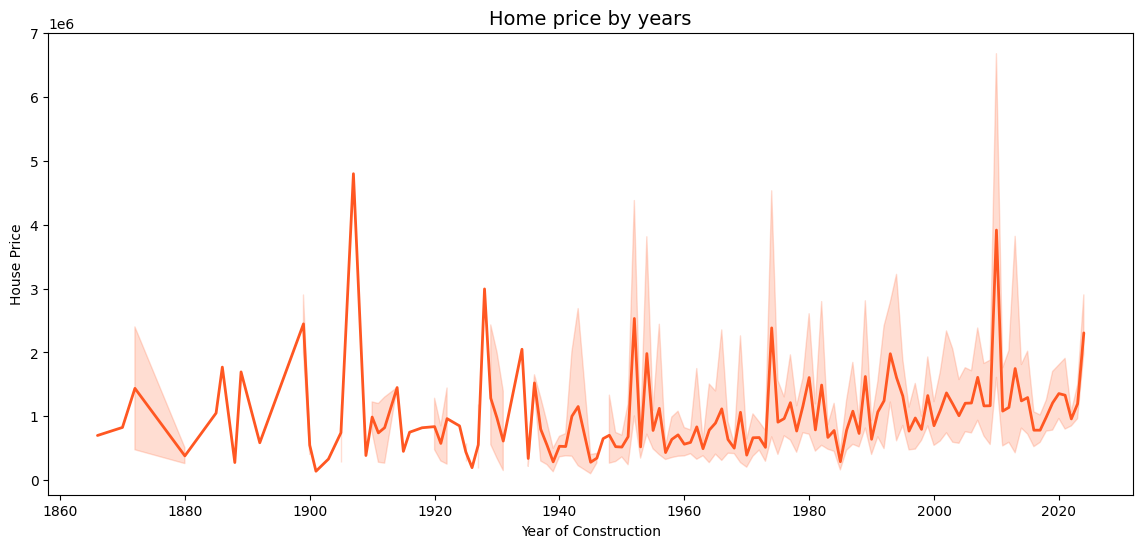

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(14,6))
mpl.rcParams.update(mpl.rcParamsDefault) #matplotlib orjinal teması
plt.title('Home price by years',fontsize = 14)
sns.set(rc = {'axes.facecolor' : '#283747', 'axes.grid':True, 'xtick.labelsize': 14, 'ytick.labelsize':14})
sns.lineplot(x=df['Year of Construction'][100:2000], y=df['House Price'][100:2000], data=df, color="#FF5722", linewidth=2)
plt.show()

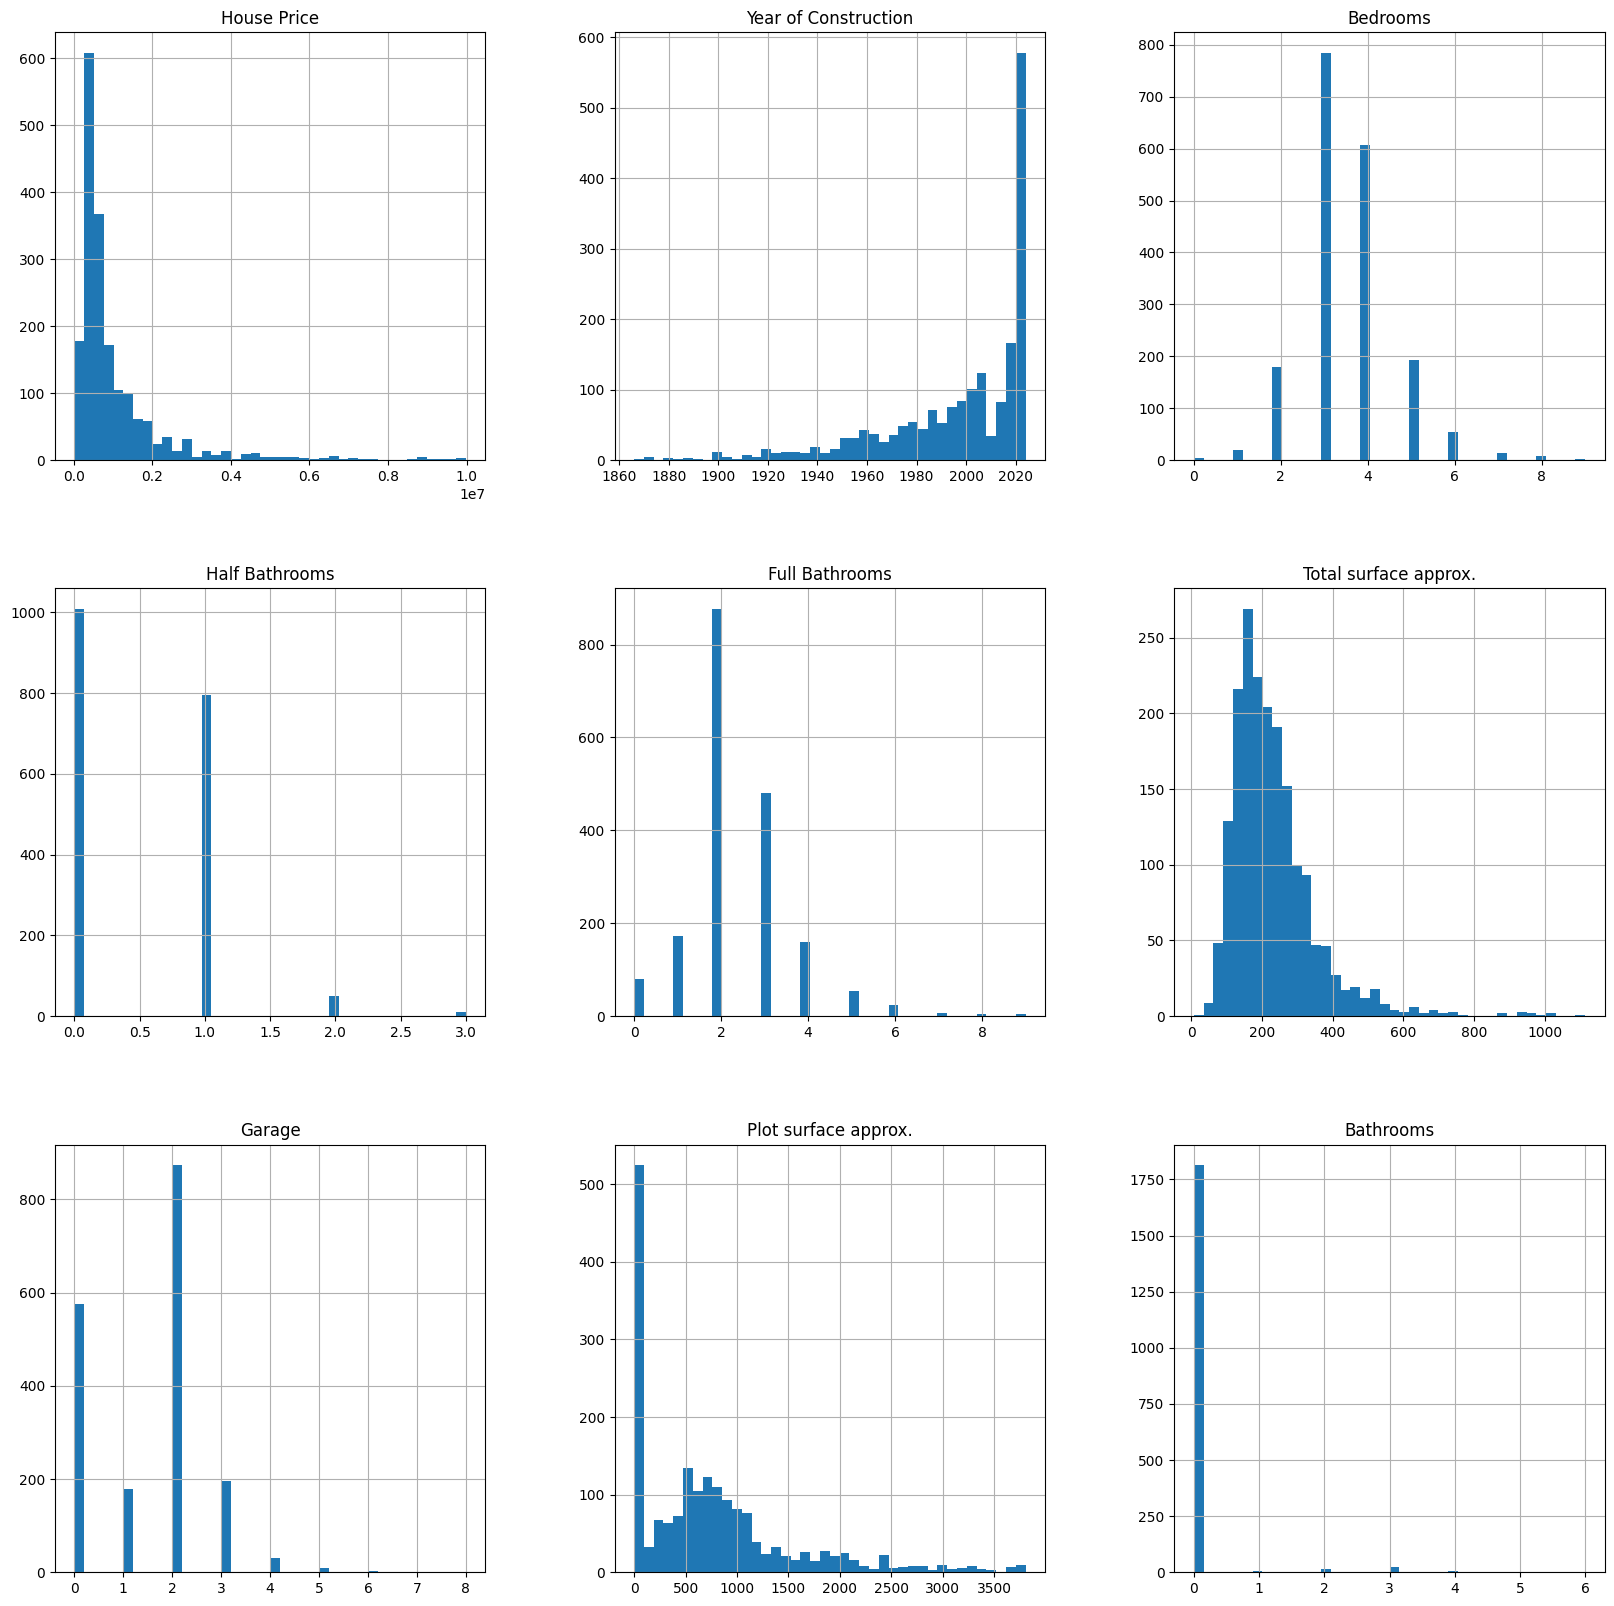

In [46]:
mpl.rcParams.update(mpl.rcParamsDefault)
df.hist(bins=40,figsize=(20,20))
plt.show()

In [47]:
ıd =df.iloc[:,2:3]
ıd

,E&V ID
0,AM-184755
1,AM-184753
2,AM-184746
3,AM-184739
4,AM-184627
...,...
1861,AM-253831
1862,AM-253828
1863,AM-253820
1864,AM-253818


In [48]:
X = df.drop('E&V ID',axis=1)
X=X.drop(['House Price'], axis=True)
X

,Year of Construction,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
0,2023,3,1,3,232.26,2,0.00,0.0
1,2022,3,1,3,232.26,2,0.00,0.0
2,2023,3,1,3,278.71,2,0.00,0.0
3,2023,4,1,3,276.39,2,0.00,0.0
4,2021,3,1,3,232.26,2,0.00,0.0
...,...,...,...,...,...,...,...,...
1861,1995,2,0,2,277.78,2,323.75,0.0
1862,1981,4,0,2,159.79,0,0.00,0.0
1863,2018,4,1,3,238.30,0,137.59,0.0
1864,2022,2,1,2,174.66,1,607.03,0.0


In [49]:
y=df['House Price']
y

0        790000
1        790000
2        790000
3       1345000
4        700000
         ...   
1861     475000
1862     239999
1863     625000
1864    2175000
1865     210000
Name: House Price, Length: 1866, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
tahmin=lr.predict(x_test)
tahmin

array([ 945134.19317228, 1049669.48739364, 1040351.39814693,
       1115431.91113368, 1125344.25995397, 1113415.47075031,
       1109721.45418302, 1118046.47932707,  957157.94962253,
        989245.92416133, 1004657.91334216, 1005660.916147  ,
       1094069.2692592 , 1134142.98051446, 1099481.36729722,
        965364.50591601, 1002517.43531853, 1116508.90723546,
       1049030.26828653,  944826.75523463, 1007436.12201761,
       1041443.94832311, 1113517.59722257, 1072103.66874967,
        955141.10434465, 1017627.08640362, 1123728.20924011,
       1200311.45071842, 1091773.25239928, 1016332.29898403,
       1089875.76826552, 1043279.3879538 ,  933546.03528289,
        965251.19020167, 1037839.12152417,  932700.30045983,
       1036945.42516904, 1111843.87400485, 1058672.88439806,
       1009356.39357876,  955556.99122369, 1081749.27712539,
       1118282.13600723, 1113737.11578838, 1108440.82207918,
       1048150.83478207,  863683.8485418 , 1102560.01554489,
       1114146.71811754,

In [67]:
tahmin=lr.predict(x_test[5:10])
tahmin

array([1113415.47075031, 1109721.45418302, 1118046.47932707,
        957157.94962253,  989245.92416133])

In [68]:
y_test[5:10]

1117     650000
787     1750000
634     2450000
1345     625000
843      669900
Name: House Price, dtype: int64

In [66]:
print(lr.score(x_test,y_test))
print(lr.score(x_train,y_train))

-0.01728793898418557
0.0021394571727915146


In [51]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

In [52]:
X = df.drop('E&V ID',axis=1)
X=X.drop(['House Price'], axis=True)
X

,Year of Construction,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
0,2023,3,1,3,232.26,2,0.00,0.0
1,2022,3,1,3,232.26,2,0.00,0.0
2,2023,3,1,3,278.71,2,0.00,0.0
3,2023,4,1,3,276.39,2,0.00,0.0
4,2021,3,1,3,232.26,2,0.00,0.0
...,...,...,...,...,...,...,...,...
1861,1995,2,0,2,277.78,2,323.75,0.0
1862,1981,4,0,2,159.79,0,0.00,0.0
1863,2018,4,1,3,238.30,0,137.59,0.0
1864,2022,2,1,2,174.66,1,607.03,0.0


In [53]:
y=df['House Price']
y

0        790000
1        790000
2        790000
3       1345000
4        700000
         ...   
1861     475000
1862     239999
1863     625000
1864    2175000
1865     210000
Name: House Price, Length: 1866, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=144)

In [55]:
params = {'colsample_bytree':[0.4,0.5,0.6],
          'learning_rate':[0.01,0.02,0.09],
          'max_depth':[2,3,4,5,6],
          'n_estimators':[100,200,500,2000]}

In [56]:
xgb = XGBRegressor()

In [57]:
grid = GridSearchCV(xgb,params,cv=10,n_jobs=-1,verbose=2)

In [58]:
grid.fit(X_train,y_train)   

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[20:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'learning_rate': [0.01, 0.02, 0.09],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 2000]},
             verbose=2)

In [59]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.02,
 'max_depth': 4,
 'n_estimators': 200}

In [60]:
best_xgb = XGBRegressor(colsample_bytree= 0.5,learning_rate= 0.02,max_depth= 4,n_estimators=200)

In [61]:
model_xgb = best_xgb.fit(X_train,y_train)

[20:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
model_xgb.predict(X_test)[5:10]

array([ 662558.5, 1655415.1,  670065.8,  777416.1,  596549.2],
      dtype=float32)

In [62]:
y_test[5:10]

1117     650000
787     1750000
634     2450000
1345     625000
843      669900
Name: House Price, dtype: int64

In [69]:
model_xgb.score(X_test,y_test)

0.45352851415083895

In [71]:
model_xgb.score(X_train,y_train)

0.6858269973231573

In [73]:
model_xgb.save_model("model.json")

In [75]:
model_xgb_2 = XGBRegressor()
model_xgb_2.load_model("model.json")

[20:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
x_test[2:3]

,Year of Construction,Bedrooms,Half Bathrooms,Full Bathrooms,Total surface approx.,Garage,Plot surface approx.,Bathrooms
1055,1998,4,1,3,313.55,0,0.0,0.0


In [77]:
pre = [{'Year of Construction':1998,
       'Bedrooms':4,
       'Half Bathrooms':1,
       'Full Bathrooms':3,
       'Total surface approx.':313,
       'Garage':0,
       'Plot surface approx.':0,
       'Bathrooms':0}]

df.pre = pd.DataFrame.from_dict(pre)

<ipython-input-77-daf273ee1738>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.pre = pd.DataFrame.from_dict(pre)


In [78]:
model_xgb_2.predict(df.pre)

array([1267052.1], dtype=float32)

In [79]:
model_xgb.predict(x_test[2:3])

array([1267052.1], dtype=float32)

In [80]:
y_test[2:3]

1637    1150000
Name: House Price, dtype: int64